<a href="https://colab.research.google.com/github/Demilock/Macroeconomic-feature-prediction-using-ARIMA/blob/master/stock_prediction_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import datetime
from keras.layers import Activation,GRU,Layer,Dropout
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [0]:
from google.colab import files
uploaded = files.upload()

Saving oil_price_2004.csv to oil_price_2004.csv


In [0]:
import io
df = pd.read_csv(io.StringIO(uploaded['oil_price_2004.csv'].decode('utf-8')))
df


,Category: All categories
Month,oil price: (United States)
2004-01,7
2004-02,7
2004-03,8
2004-04,7
...,...
2019-12,14
2020-01,19
2020-02,19
2020-03,80


In [0]:
df=df.iloc[1:197,:]
df=df.rename(columns={"Index": "Date", "Category: All categories": "values"})
df1 = web.DataReader('SPY', data_source='yahoo', start='2012-01-01', end='2019-12-17')

d=df1.values
print(d)

[[1.28380005e+02 1.27430000e+02 1.27760002e+02 1.27500000e+02
  1.93697900e+08 1.08037117e+02]
 [1.27809998e+02 1.26709999e+02 1.27199997e+02 1.27699997e+02
  1.27186500e+08 1.08206604e+02]
 [1.28229996e+02 1.26430000e+02 1.27010002e+02 1.28039993e+02
  1.73895000e+08 1.08494698e+02]
 ...
 [3.18670013e+02 3.16019989e+02 3.16869995e+02 3.17320007e+02
  8.15039000e+07 3.13921600e+02]
 [3.20149994e+02 3.17250000e+02 3.19220001e+02 3.19500000e+02
  8.27497000e+07 3.16078217e+02]
 [3.20250000e+02 3.19480011e+02 3.19920013e+02 3.19570007e+02
  6.10977000e+07 3.16147491e+02]]


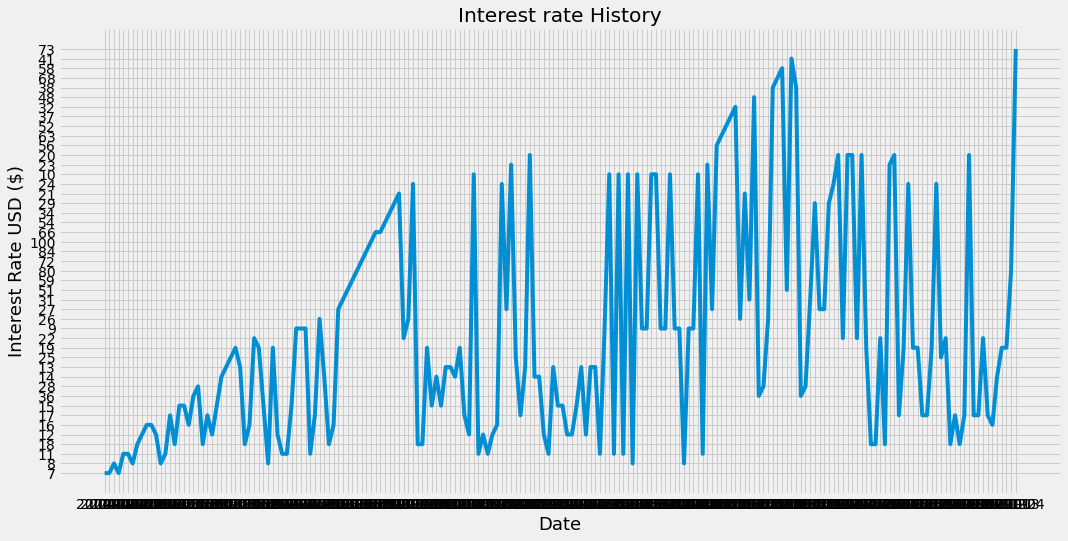

In [0]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Interest rate History')
plt.plot(df['values'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Interest Rate USD ($)', fontsize=18)
plt.show()

In [0]:
#Create a new dataframe with only the 'Close column
data = df.filter(['values'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len
dataset1 = df.values
print(dataset1)

[['7']
 ['7']
 ['8']
 ['7']
 ['11']
 ['11']
 ['8']
 ['18']
 ['12']
 ['16']
 ['16']
 ['12']
 ['8']
 ['11']
 ['17']
 ['18']
 ['15']
 ['15']
 ['16']
 ['36']
 ['28']
 ['18']
 ['17']
 ['12']
 ['15']
 ['14']
 ['13']
 ['25']
 ['19']
 ['13']
 ['18']
 ['16']
 ['22']
 ['19']
 ['15']
 ['8']
 ['19']
 ['12']
 ['11']
 ['11']
 ['15']
 ['9']
 ['9']
 ['9']
 ['11']
 ['17']
 ['26']
 ['14']
 ['18']
 ['16']
 ['27']
 ['31']
 ['51']
 ['59']
 ['80']
 ['72']
 ['84']
 ['100']
 ['66']
 ['66']
 ['54']
 ['34']
 ['29']
 ['21']
 ['22']
 ['26']
 ['24']
 ['18']
 ['18']
 ['19']
 ['15']
 ['14']
 ['15']
 ['13']
 ['13']
 ['14']
 ['19']
 ['17']
 ['12']
 ['10']
 ['11']
 ['12']
 ['11']
 ['12']
 ['16']
 ['24']
 ['27']
 ['23']
 ['25']
 ['17']
 ['13']
 ['20']
 ['14']
 ['14']
 ['12']
 ['11']
 ['13']
 ['15']
 ['15']
 ['12']
 ['12']
 ['15']
 ['13']
 ['12']
 ['13']
 ['13']
 ['11']
 ['9']
 ['10']
 ['11']
 ['10']
 ['11']
 ['10']
 ['8']
 ['10']
 ['9']
 ['9']
 ['10']
 ['10']
 ['9']
 ['9']
 ['10']
 ['9']
 ['9']
 ['8']
 ['9']
 ['9']
 ['1

In [0]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

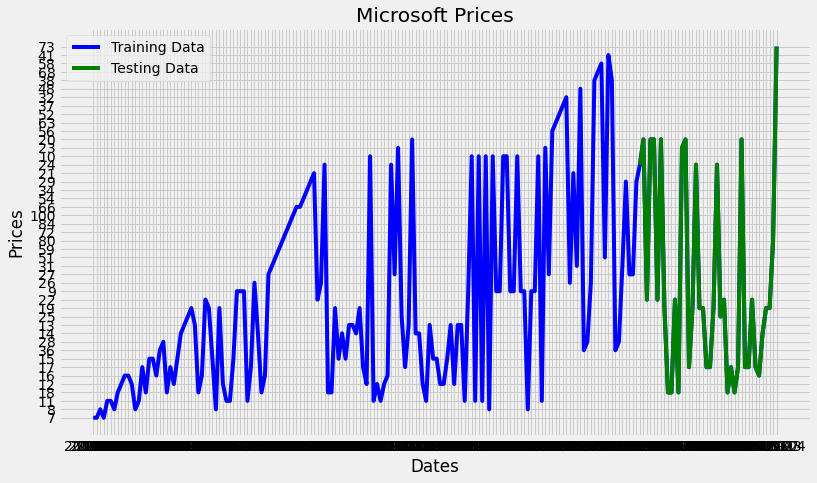

In [0]:
#pd.to_numeric(df)
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Microsoft Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['values'], 'blue', label='Training Data')
plt.plot(test_data['values'], 'green', label='Testing Data')
#plt.xticks(np.arange(0,7982, 1300), df['Index'][0:7982:1300])
plt.legend()

In [0]:
def smape_kun(y_true, y_pred):
  return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))
print(type(dataset))

<class 'numpy.ndarray'>


In [0]:
train_ar = train_data['values'].values
test_ar = test_data['values'].values
#train_ar, test_ar = np.array(train_ar), np.array(test_ar)
print(type(train_ar))
history = [int(x) for x in train_ar]
print(type(history[0]))
history=np.array(history)
predictions = list()
'''predictions=np.array(predictions)
print(type(predictions))'''

for t in range(len(test_ar)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history=np.append(history,int(obs))
error = np.sqrt(mean_squared_error(test_ar, predictions))
print('Testing Mean Squared Error: %.3f' % error)
'''error2 = smape_kun(float(test_ar), float(predictions))
print('Symmetric mean absolute percentage error: %.3f' % error2)'''


<class 'numpy.ndarray'>
<class 'int'>
Testing Mean Squared Error: 10.221


"error2 = smape_kun(float(test_ar), float(predictions))\nprint('Symmetric mean absolute percentage error: %.3f' % error2)"

(39, 1)
(40, 1)


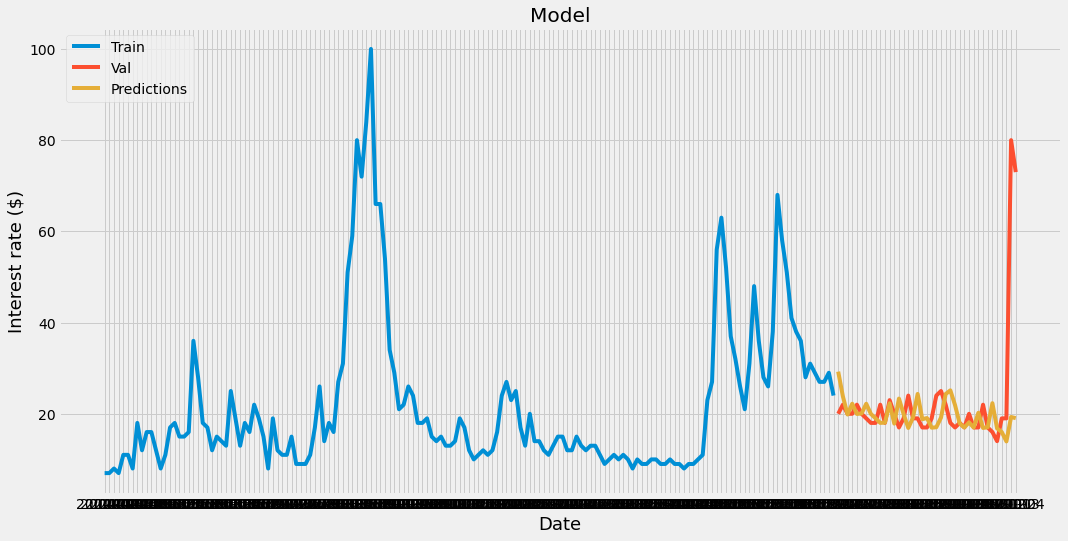

In [0]:
'''plt.figure(figsize=(12,7))
plt.plot(df['values'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['values'], color='red', label='Actual Price')
plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
#plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()'''
train = df[:training_data_len]
valid = df[training_data_len:]
valid=valid.astype('float32')
train=train.astype('float32')
predictions=np.array(predictions)
print(valid.shape)
print(predictions.shape)
predictions=predictions[:39,:]
#valid=valid.iloc[:37,:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Interest rate ($)', fontsize=18)
plt.plot(train['values'])
plt.plot(valid[['values', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()